# Trained Models Evaluation

In this notebook, all models that have been trained will be evaluated. This involves using the same dataset for all so we would have a direct comparison, at the end the best model will be selected to be fully trained for a large number of epochs

At the same time, the other models from different works will be evaluated as well to compare the state of the art with the developed model

It's important to mention that the criteria of tuning hyperparameters expirements were done separately, meaning that in each expirement, we fix all other parameters (whatever it is, the best or not) and then we compare different values of the parameter that we work on at the moment. At the end the ultimate goal is to decide which value is better. When all parameters are expiremented, then we will train the final model with full capacity in terms of data size and number of epochs

## Data Preparing

In [1]:
from Train_evaluate import *
from modeling import *
from torchsig.models.iq_models.efficientnet.efficientnet import efficientnet_b0,efficientnet_b2,efficientnet_b4
from xcit.xcit import xcit_nano

In [11]:
from Train_evaluate import *
from modeling import *


In [3]:
selected_classes = [
        "bpsk",
        "qpsk",
        "8psk",
        "16qam",
        "64qam",
        "256qam",
        "ofdm-64",
        "ofdm-72",
        "ofdm-128",
        "ofdm-180",
        "ofdm-256",
        "ofdm-300",
        "ofdm-512",
        "ofdm-600",
        "ofdm-900",
        "ofdm-1024",
        "ofdm-1200",
        "ofdm-2048",
    ]

In [5]:
# Specify Sig53 Options
#root = "sig18/"
root = "../../../../data/torchsig/sig18"
train = False
impaired = True

transform = ST.Compose([
    ST.Normalize(norm=np.inf),
    ST.ComplexTo2D(),
])
target_transform = ST.DescToClassIndex(class_list=selected_classes)


# Instantiate the Sig53 Clean Validation Dataset
sig53_clean_val = Sig53(
    root=root,
    train=train,
    impaired=impaired,
    transform=transform,
    target_transform=target_transform,
    use_signal_data=True,
)

# Retrieve a sample and print out information to verify
idx = np.random.randint(len(sig53_clean_val))
data, label = sig53_clean_val[idx]
print("Dataset length: {}".format(len(sig53_clean_val)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))

Dataset length: 18000
Data shape: (2, 4096)
Label Index: 4
Label Class: 64qam


In [6]:
test_dataloader = DataLoader(
    dataset=sig53_clean_val,
    batch_size=128,
    num_workers=8,
    shuffle=False,
    drop_last=True,
)

## Evaluation

## Existing models

Firstly we will evaluate State of Art models, where they were trained on the full dataset which consists of 1.8M instances

### EfficientNetB0

In [6]:
PATH = "best_model_checkpoint_eff0.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

In [8]:
model = efficientnet_b0(
    pretrained=False,
    num_classes=len(selected_classes)
)
model = model.to(device)

In [9]:
state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [10]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.4738
Validation Accuracy: 45.99%
Average Inference Time per Batch: 7.3762 seconds


<Figure size 2000x2000 with 0 Axes>

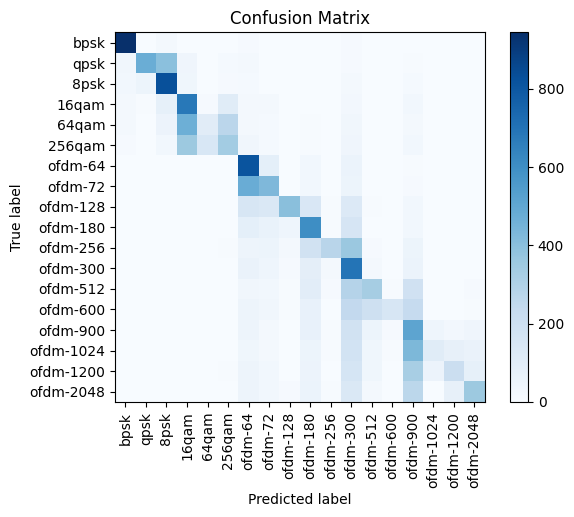

In [11]:
plot_conf_matrix( labels, predictions,selected_classes)

### EfficientNetB2

In [13]:
PATH = "best_model_checkpoint_eff2.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

model = efficientnet_b2(
    pretrained=False,
    num_classes=len(selected_classes)
)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [14]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.3248
Validation Accuracy: 48.86%
Average Inference Time per Batch: 12.2791 seconds


In [ ]:
plot_conf_matrix( labels, predictions,selected_classes)

### EfficientNetB4

In [15]:
PATH = "best_model_checkpoint_eff4.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

model = efficientnet_b4(
    pretrained=False,
    num_classes=len(selected_classes)
)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.2109
Validation Accuracy: 53.92%
Average Inference Time per Batch: 22.3106 seconds


<Figure size 2000x2000 with 0 Axes>

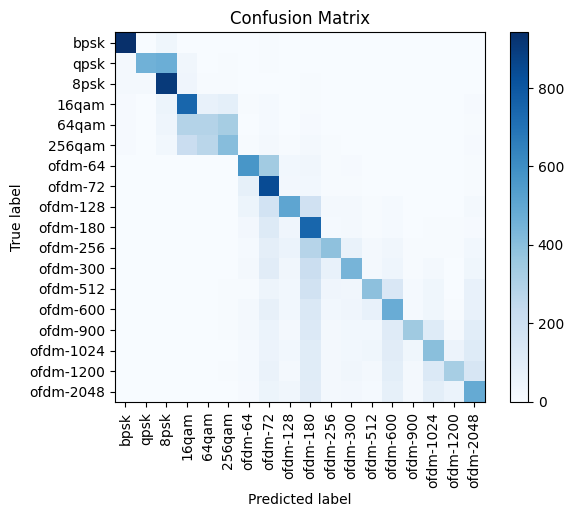

In [16]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

plot_conf_matrix( labels, predictions,selected_classes)

### XCiT-Nano

In [ ]:
PATH = "???.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

model = xcit_nano(
    pretrained=False,
    num_classes=len(selected_classes)
)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

In [ ]:
state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

## Developed Model

### Batch Size

#### Batch_size = 256

In [13]:
PATH = "checkpoints/best_model_checkpoint.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

In [8]:
model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)


In [9]:
model = model.to(device)

In [ ]:
state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

In [16]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.2248
Validation Accuracy: 51.95%
Average Inference Time per Batch: 11.1851 seconds


<Figure size 1500x1500 with 0 Axes>

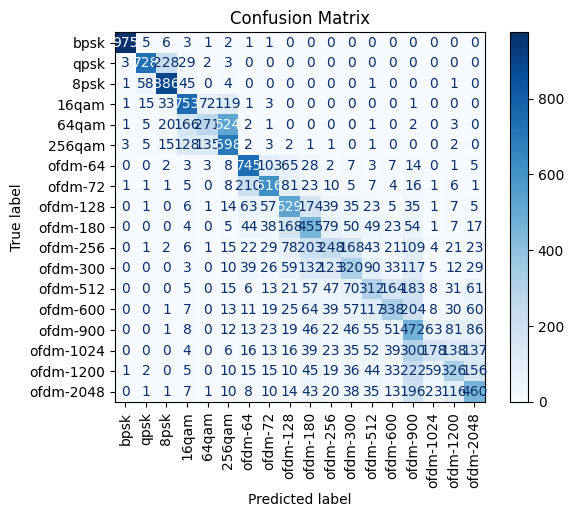

In [19]:
plot_conf_matrix( labels, predictions,selected_classes)

#### Batch_size = 128

In [5]:
PATH = "checkpoints/best_model_checkpoint1.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

In [9]:
model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

In [7]:
state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [8]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.2115
Validation Accuracy: 52.56%
Average Inference Time per Batch: 10.9712 seconds


<Figure size 2000x2000 with 0 Axes>

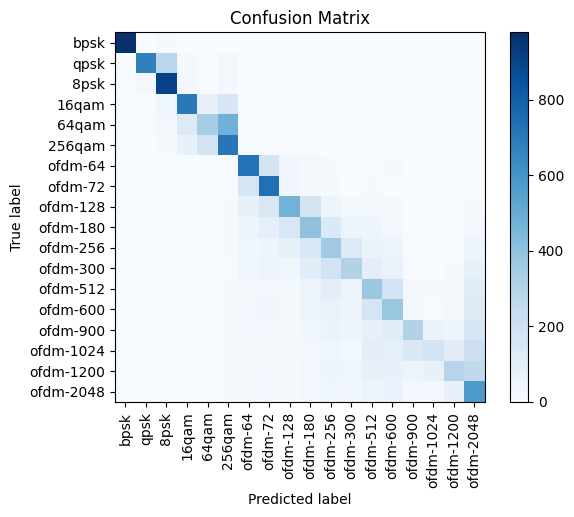

In [9]:
plot_conf_matrix( labels, predictions,selected_classes)

#### Batch_size = 64

In [6]:
PATH = "checkpoints/best_model_checkpoint2.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')

In [10]:
state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [11]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.2746
Validation Accuracy: 50.79%
Average Inference Time per Batch: 11.3952 seconds


<Figure size 2000x2000 with 0 Axes>

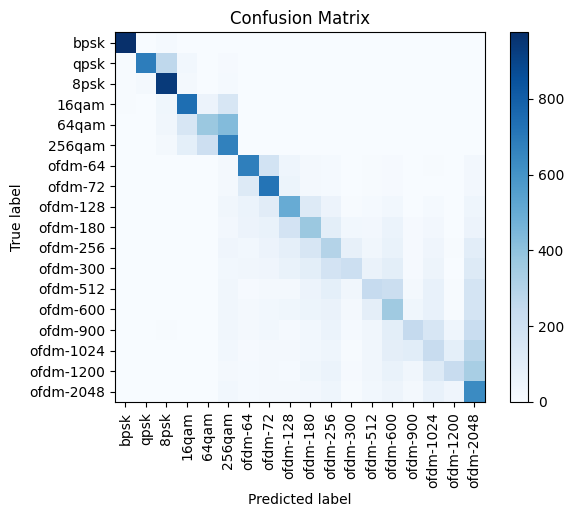

In [12]:
plot_conf_matrix( labels, predictions,selected_classes)

Based on above results, we can see that the best batch size is 128 and will be considered in the final model

### Activation Function

#### Relu

In [16]:
PATH = "../../best_model_checkpoint.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')

In [17]:
model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

In [18]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.4341
Validation Accuracy: 45.07%
Average Inference Time per Batch: 0.1423 seconds


<Figure size 2000x2000 with 0 Axes>

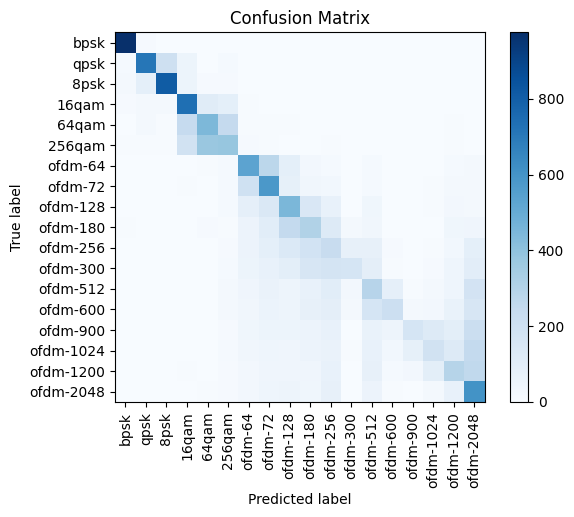

In [19]:
plot_conf_matrix( labels, predictions,selected_classes)

#### Leaky relu

In [22]:
PATH = "../../best_model_checkpoint_leakyR.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')

In [23]:
model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4996
Validation Accuracy: 42.48%
Average Inference Time per Batch: 0.1447 seconds


<Figure size 2000x2000 with 0 Axes>

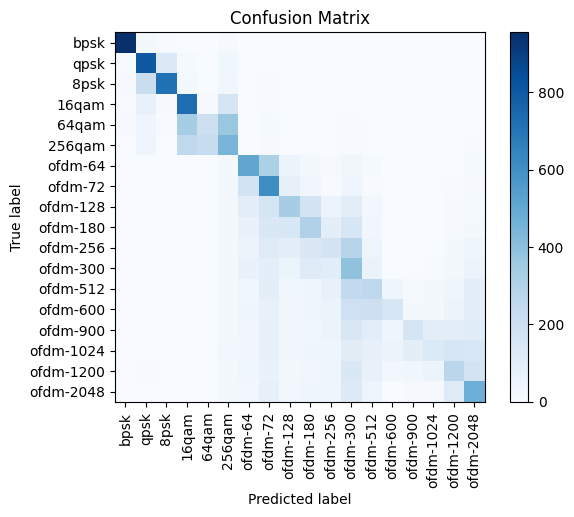

In [24]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

plot_conf_matrix( labels, predictions,selected_classes)


#### selu

In [5]:
PATH = "../../best_model_checkpoint_selu.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')

In [6]:
model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

In [8]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']

Validation Loss: 1.4376
Validation Accuracy: 44.76%
Average Inference Time per Batch: 0.1536 seconds


<Figure size 2000x2000 with 0 Axes>

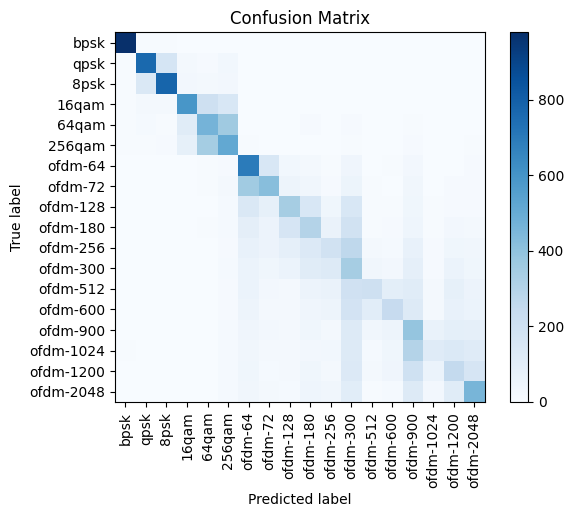

In [9]:
plot_conf_matrix( labels, predictions,selected_classes)

it turns out that relu has achieved the best accuracy and therefore will be chosen for the final model

### Learning Rate

learning rate 5e-4 

In [5]:
PATH = "best_model_checkpoint_adamw.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.5205
Validation Accuracy: 43.44%
Average Inference Time per Batch: 11.2220 seconds


<Figure size 2000x2000 with 0 Axes>

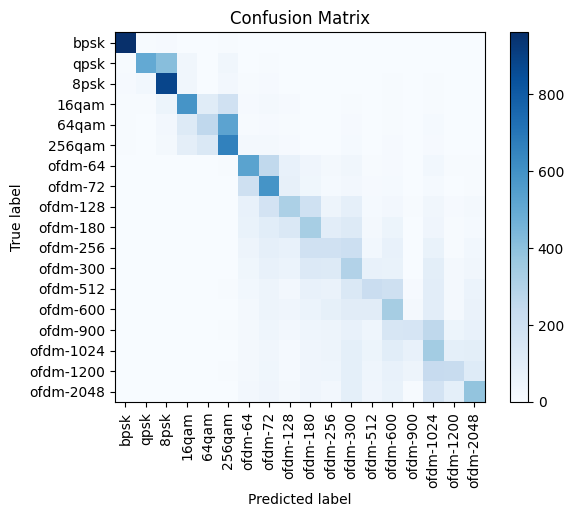

In [6]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

learning rate 1e-3

In [8]:
PATH = "best_model_checkpoint_adamw1.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4967
Validation Accuracy: 44.92%
Average Inference Time per Batch: 11.2100 seconds


<Figure size 2000x2000 with 0 Axes>

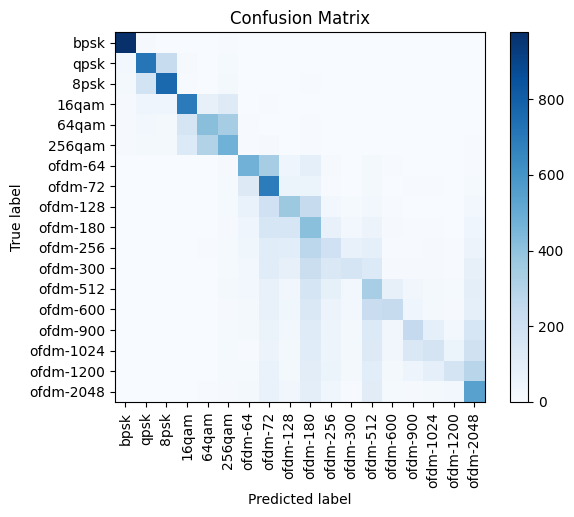

In [9]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

learning rate 1e-2

In [10]:
PATH = "best_model_checkpoint_adamw2.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.5963
Validation Accuracy: 38.42%
Average Inference Time per Batch: 10.9321 seconds


<Figure size 2000x2000 with 0 Axes>

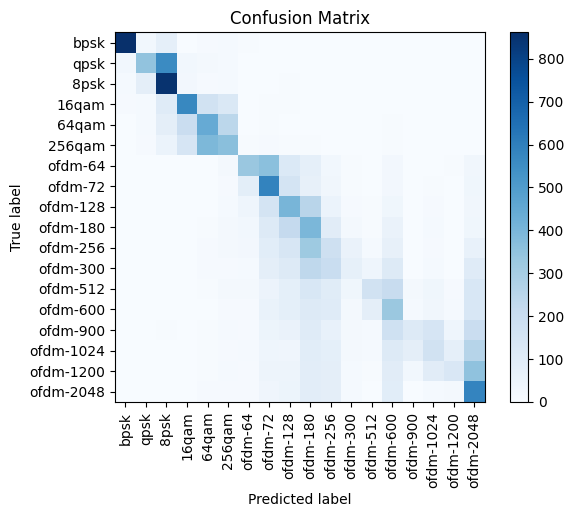

In [11]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

### Optimizer

#### AdamW

In [8]:
PATH = "../../best_model_checkpoint_AdamW.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4,5,6,7], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['layer3.5.conv1.weight', 'layer3.5.bn1.weight', 'layer3.5.bn1.bias', 'layer3.5.bn1.running_mean', 'layer3.5.bn1.running_var', 'layer3.5.conv2.depthwise.weight', 'layer3.5.conv2.pointwise.weight', 'layer3.5.bn2.weight', 'layer3.5.bn2.bias', 'layer3.5.bn2.running_mean', 'layer3.5.bn2.running_var', 'layer3.5.conv3.weight', 'layer3.5.bn3.weight', 'layer3.5.bn3.bias', 'layer3.5.bn3.running_mean', 'layer3.5.bn3.running_var', 'layer3.5.se.fc.0.weight', 'layer3.5.se.fc.2.weight', 'layer4.4.conv1.weight', 'layer4.4.bn1.weight', 'layer4.4.bn1.bias', 'layer4.4.bn1.running_mean', 'layer4.4.bn1.running_var', 'layer4.4.conv2.depthwise.weight', 'layer4.4.conv2.pointwise.weight', 'layer4.4.bn2.weight', 'layer4.4.bn2.bias', 'layer4.4.bn2.running_mean', 'layer4.4.bn2.running_var', 'layer4.4.conv3.weight', 'layer4.4.bn3.weight', 'layer4.4.bn3.bias', 'layer4.4.bn3.running_mean', 'layer4.4.bn3.running_var', 'layer4.4.se.fc.0.weight', 'layer4.4.se.fc.2.weight', 'layer4.5.conv

Validation Loss: 1.4467
Validation Accuracy: 44.79%
Average Inference Time per Batch: 0.7738 seconds


<Figure size 1500x1500 with 0 Axes>

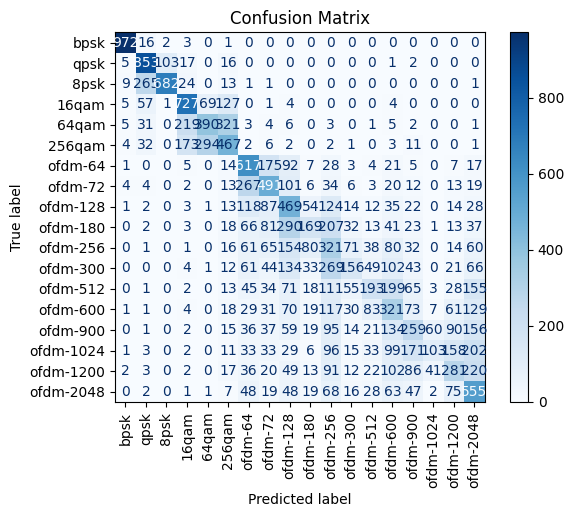

In [9]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

#### Adam

In [9]:
PATH = "../../best_model_checkpoint_adam.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4,5,6,7], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['layer3.5.conv1.weight', 'layer3.5.bn1.weight', 'layer3.5.bn1.bias', 'layer3.5.bn1.running_mean', 'layer3.5.bn1.running_var', 'layer3.5.conv2.depthwise.weight', 'layer3.5.conv2.pointwise.weight', 'layer3.5.bn2.weight', 'layer3.5.bn2.bias', 'layer3.5.bn2.running_mean', 'layer3.5.bn2.running_var', 'layer3.5.conv3.weight', 'layer3.5.bn3.weight', 'layer3.5.bn3.bias', 'layer3.5.bn3.running_mean', 'layer3.5.bn3.running_var', 'layer3.5.se.fc.0.weight', 'layer3.5.se.fc.2.weight', 'layer4.4.conv1.weight', 'layer4.4.bn1.weight', 'layer4.4.bn1.bias', 'layer4.4.bn1.running_mean', 'layer4.4.bn1.running_var', 'layer4.4.conv2.depthwise.weight', 'layer4.4.conv2.pointwise.weight', 'layer4.4.bn2.weight', 'layer4.4.bn2.bias', 'layer4.4.bn2.running_mean', 'layer4.4.bn2.running_var', 'layer4.4.conv3.weight', 'layer4.4.bn3.weight', 'layer4.4.bn3.bias', 'layer4.4.bn3.running_mean', 'layer4.4.bn3.running_var', 'layer4.4.se.fc.0.weight', 'layer4.4.se.fc.2.weight', 'layer4.5.conv

Validation Loss: 1.4349
Validation Accuracy: 44.70%
Average Inference Time per Batch: 0.1833 seconds


<Figure size 1500x1500 with 0 Axes>

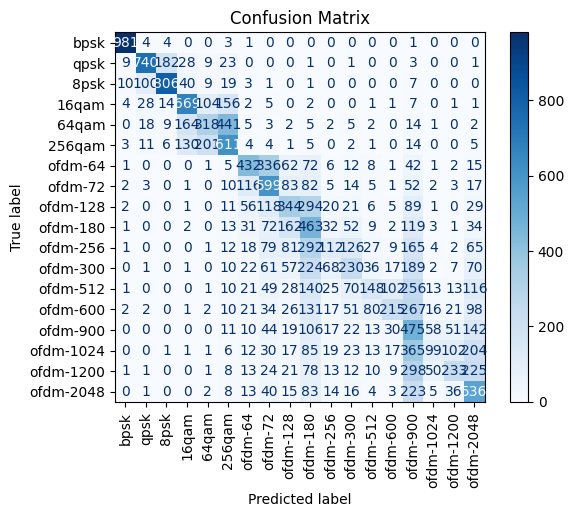

In [10]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

#### RM

In [12]:
PATH = "../../checkpoints/best_model_checkpoint_RMSprop.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4,5,6,7], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['layer3.5.conv1.weight', 'layer3.5.bn1.weight', 'layer3.5.bn1.bias', 'layer3.5.bn1.running_mean', 'layer3.5.bn1.running_var', 'layer3.5.conv2.depthwise.weight', 'layer3.5.conv2.pointwise.weight', 'layer3.5.bn2.weight', 'layer3.5.bn2.bias', 'layer3.5.bn2.running_mean', 'layer3.5.bn2.running_var', 'layer3.5.conv3.weight', 'layer3.5.bn3.weight', 'layer3.5.bn3.bias', 'layer3.5.bn3.running_mean', 'layer3.5.bn3.running_var', 'layer3.5.se.fc.0.weight', 'layer3.5.se.fc.2.weight', 'layer4.4.conv1.weight', 'layer4.4.bn1.weight', 'layer4.4.bn1.bias', 'layer4.4.bn1.running_mean', 'layer4.4.bn1.running_var', 'layer4.4.conv2.depthwise.weight', 'layer4.4.conv2.pointwise.weight', 'layer4.4.bn2.weight', 'layer4.4.bn2.bias', 'layer4.4.bn2.running_mean', 'layer4.4.bn2.running_var', 'layer4.4.conv3.weight', 'layer4.4.bn3.weight', 'layer4.4.bn3.bias', 'layer4.4.bn3.running_mean', 'layer4.4.bn3.running_var', 'layer4.4.se.fc.0.weight', 'layer4.4.se.fc.2.weight', 'layer4.5.conv

Validation Loss: 2.1965
Validation Accuracy: 19.80%
Average Inference Time per Batch: 0.1728 seconds


<Figure size 2000x2000 with 0 Axes>

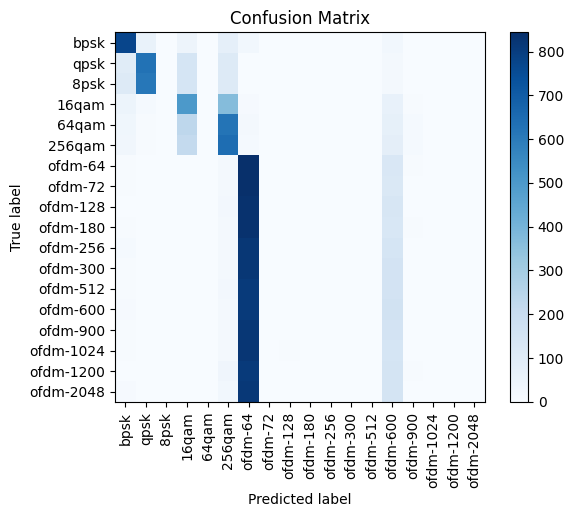

In [13]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

#### SGD

In [14]:
PATH = "../../checkpoints/best_model_checkpoint_SGD.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4,5,6,7], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

_IncompatibleKeys(missing_keys=['layer3.5.conv1.weight', 'layer3.5.bn1.weight', 'layer3.5.bn1.bias', 'layer3.5.bn1.running_mean', 'layer3.5.bn1.running_var', 'layer3.5.conv2.depthwise.weight', 'layer3.5.conv2.pointwise.weight', 'layer3.5.bn2.weight', 'layer3.5.bn2.bias', 'layer3.5.bn2.running_mean', 'layer3.5.bn2.running_var', 'layer3.5.conv3.weight', 'layer3.5.bn3.weight', 'layer3.5.bn3.bias', 'layer3.5.bn3.running_mean', 'layer3.5.bn3.running_var', 'layer3.5.se.fc.0.weight', 'layer3.5.se.fc.2.weight', 'layer4.4.conv1.weight', 'layer4.4.bn1.weight', 'layer4.4.bn1.bias', 'layer4.4.bn1.running_mean', 'layer4.4.bn1.running_var', 'layer4.4.conv2.depthwise.weight', 'layer4.4.conv2.pointwise.weight', 'layer4.4.bn2.weight', 'layer4.4.bn2.bias', 'layer4.4.bn2.running_mean', 'layer4.4.bn2.running_var', 'layer4.4.conv3.weight', 'layer4.4.bn3.weight', 'layer4.4.bn3.bias', 'layer4.4.bn3.running_mean', 'layer4.4.bn3.running_var', 'layer4.4.se.fc.0.weight', 'layer4.4.se.fc.2.weight', 'layer4.5.conv

Validation Loss: 1.7139
Validation Accuracy: 33.32%
Average Inference Time per Batch: 0.1757 seconds


<Figure size 2000x2000 with 0 Axes>

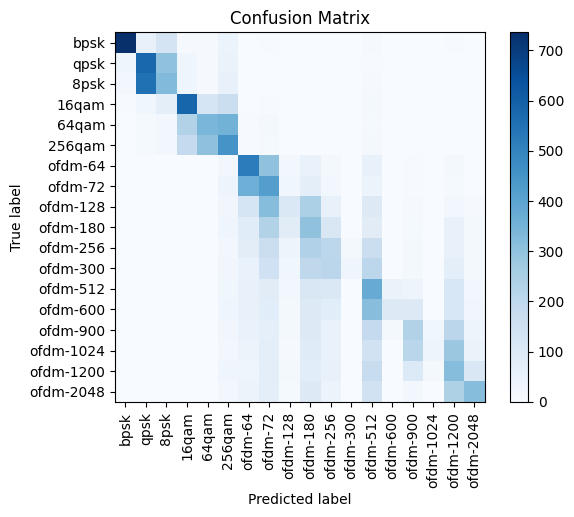

In [15]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

### Number of Blocks

#### [4567]

In [7]:
PATH = "best_model_checkpoint_4567.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [4,5,6,7], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4157
Validation Accuracy: 46.57%
Average Inference Time per Batch: 13.7146 seconds


<Figure size 2000x2000 with 0 Axes>

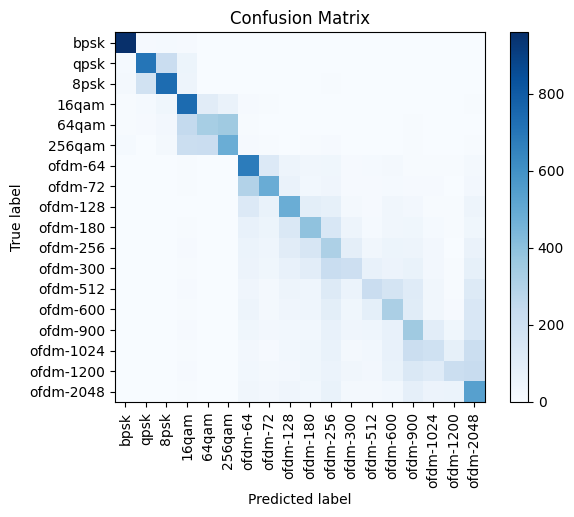

In [8]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

#### [5665]

In [9]:
PATH = "best_model_checkpoint_5665.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [5,6,6,5], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4425
Validation Accuracy: 45.41%
Average Inference Time per Batch: 13.4837 seconds


<Figure size 2000x2000 with 0 Axes>

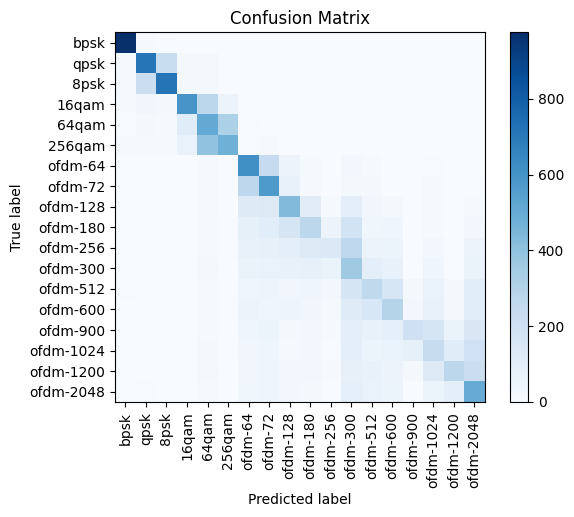

In [10]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

#### 6776

In [5]:
PATH = "best_model_checkpoint_6776.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cpu')


model = ResNet1D(Bottleneck1D, [6,7,7,6], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4341
Validation Accuracy: 45.76%
Average Inference Time per Batch: 15.1521 seconds


<Figure size 2000x2000 with 0 Axes>

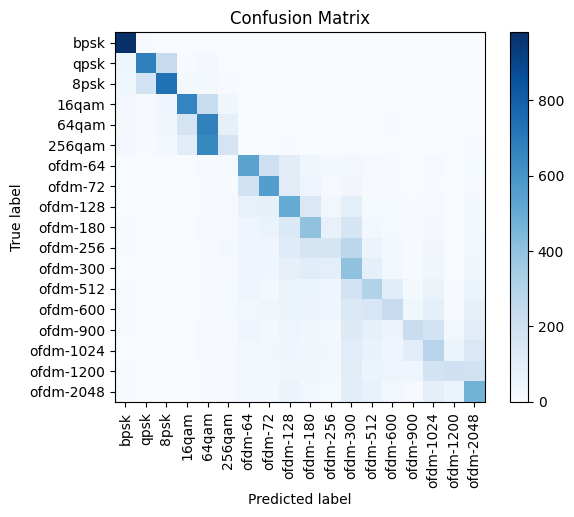

In [6]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

### Pooling mechanism in SE block

#### Max Pooling

In [5]:
PATH = "../../best_model_checkpoint_maxp.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.5298
Validation Accuracy: 41.45%
Average Inference Time per Batch: 0.3791 seconds


<Figure size 2000x2000 with 0 Axes>

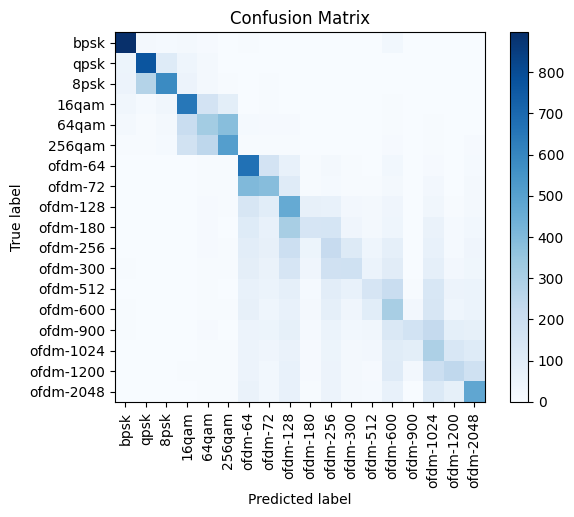

In [6]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

Average Pooling

In [16]:
PATH = "../../checkpoints/best_model_checkpoint_avgp.pth"
criterion = nn.CrossEntropyLoss()
device = torch.device('cuda')


model = ResNet1D(Bottleneck1D, [4, 5, 5, 4], num_classes=len(selected_classes), in_channels=2)
model = model.to(device)

state_dict = torch.load(PATH, map_location=device)
model.load_state_dict(state_dict, strict=False)

<All keys matched successfully>

Validation Loss: 1.4579
Validation Accuracy: 44.39%
Average Inference Time per Batch: 0.1440 seconds


<Figure size 2000x2000 with 0 Axes>

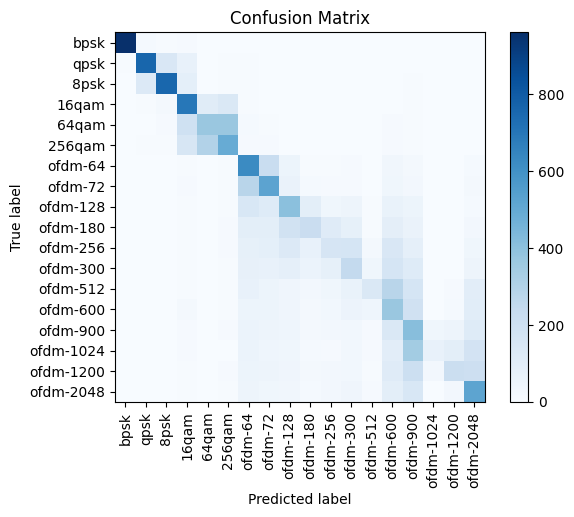

In [17]:
results = evaluate_model(model, test_dataloader, criterion,device)

labels = results['all_labels']
predictions = results['all_predictions']
plot_conf_matrix( labels, predictions,selected_classes)

In [6]:
sig53 = Sig53(
    root=root,
    train=False,
    impaired=impaired,
    transform=None,
    target_transform=None,
)

# Retrieve a sample and print out information
idx = np.random.randint(len(sig53))
data, (label, snr) = sig53[idx]
print("Dataset length: {}".format(len(sig53)))
print("Data shape: {}".format(data.shape))
print("Label Index: {}".format(label))
print("Label Class: {}".format(Sig53.convert_idx_to_name(label)))
print("SNR: {}".format(snr))

Dataset length: 18000
Data shape: (4096,)
Label Index: 1
Label Class: qpsk
SNR: 6.962418212698058


In [22]:
def get_snr_bin(snr):
    if snr <= 5:
        return '-2 to 5'
    elif 6 <= snr <= 10:
        return '6 to 10'
    elif 11 <= snr <= 15:
        return '11 to 15'
    elif 16 <= snr <= 20:
        return '16 to 20'
    elif 21 <= snr <= 25:
        return '21 to 25'
    elif 26 <= snr <= 30:
        return '26 to 30'


In [23]:
sig53_metadata = Sig53(
    root=root,
    train=False,
    impaired=impaired,
    transform=None,
    target_transform=None,
)

In [24]:
from collections import defaultdict
# Evaluation per SNR bin
model.eval()
model.to(device)
snr_bins = defaultdict(lambda: {'correct': 0, 'total': 0})

with torch.no_grad():
    for batch_idx, (inputs, labels) in enumerate(test_dataloader):
        # Get corresponding SNR values from the metadata
        start_idx = batch_idx * 16
        end_idx = start_idx + 16
        snrs = [sig53_metadata[idx][1][1] for idx in range(start_idx, end_idx)]

        inputs = inputs.to(device, dtype=torch.float32)
        labels = labels.to(device, dtype=torch.long)

        outputs = model(inputs)
        _, predicted = torch.max(outputs, 1)

        for label, pred, snr in zip(labels, predicted, snrs):
            bin_name = get_snr_bin(snr)
            snr_bins[bin_name]['total'] += 1
            if label == pred:
                snr_bins[bin_name]['correct'] += 1

# Define the bin order
bin_order = ['-2 to 5', '6 to 10', '11 to 15', '16 to 20', '21 to 25', '26 to 30']

# Calculate and print accuracy per SNR bin in order
for bin_name in bin_order:
    if bin_name in snr_bins:
        stats = snr_bins[bin_name]
        accuracy = 100 * stats['correct'] / stats['total']
        print(f"SNR Bin {bin_name}: Accuracy = {accuracy:.2f}%")
    else:
        print(f"SNR Bin {bin_name}: No data available")


SNR Bin -2 to 5: Accuracy = 50.45%
SNR Bin 6 to 10: Accuracy = 53.37%
SNR Bin 11 to 15: Accuracy = 53.85%
SNR Bin 16 to 20: Accuracy = 48.57%
SNR Bin 21 to 25: Accuracy = 55.32%
SNR Bin 26 to 30: Accuracy = 52.50%
